<a href="https://colab.research.google.com/github/LeetestOfCodes/popularity-factors-spotify/blob/main/popularity_factors_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
- When running shell commands to install dependencies for pycaret and other modules, if the execution of the cell finishes
and there is a button that says "Restart Runtime" on it, please press it, then proceed to the next cell

- For the kaggle api, please import a kaggle.json file obtained from your kaggle account, the same way as done in the first term project

-When running a cell containing the setup function, it is crucial to press the enter key into the empty bar to resume preprocessing.

-Due to the very repetitive nature of each step when handling each individual datasets, the explanation for each step will only be 
included for the 1950s datasets for the first section as well as the other 2 sections in the event of any variation in steps.

-When running the cell containing the evaluate_model function, it is important to click the leftmost 'feature importance' bar to 
ensure only the most important variables appear.

"""

# Which characteristics contributed the most to the popularity of songs during the last 70 years?

In this project, we decided to analyze 7 datasets--each containing the top 100 songs of their respective decades between the 1950s and 2010s as well as their key characteristics such as bpm, duration, danceability, etc. These properties are calculated by 'Organize Your Music.' We wanted to figure out which key attributes correlate the most with the top 100 songs of each decade.


# Setting up the Data

In [ ]:
!pip install --use-deprecated=legacy-resolver pycaret[full]

     |████████████████████████████████| 320 kB 15.5 MB/s 
     |████████████████████████████████| 88 kB 3.1 MB/s 
     |████████████████████████████████| 1.7 MB 29.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 43.5 MB/s 
     |████████████████████████████████| 1.3 MB 27.3 MB/s 
     |████████████████████████████████| 6.8 MB 43.3 MB/s 
     |████████████████████████████████| 120 kB 49.8 MB/s 
     |████████████████████████████████| 167 kB 47.0 MB/s 
     |████████████████████████████████| 17.8 MB 398 kB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 2.0 MB 48.9 MB/s 
     |████████████████████████████████| 366 kB 40.0 MB/s 
     |████████████████████████████████| 11.9 MB 43.3 MB/s 
     |████████████████████████████████| 192.9 MB 68 kB/s 
     |████████████████

In [ ]:
!pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires PyYAML>=5.0.0, but you have pyyaml 3.13 which is incompatible.
pandas-profiling 3.2.0 requires requests>=2.24.0, but you have requests 2.23.0 which is incompatible.
flask-simplelogin 0.1.1 requires click<9.0.0,>=8.0.1, but you have click 7.1.2 which is incompatible.
explainerdashboard 0.3.8.2 requires graphviz>=0.18.2, but you have graphviz 0.10.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
autoviz 0.1.39 requires matplotlib>=3.3.3, but you have 

In [ ]:
!pip install Jinja2

In [ ]:
# import libraries
import jinja2
import pandas as pd
import requests
from pycaret.regression import *
import matplotlib.pyplot as plt

In [ ]:
! pip install kaggle 

In [ ]:
#Attach the api token from Kaggle account
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"promithossain","key":"9c491157affbec5b9e5b47ada7e2ee1b"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download cnic92/spotify-past-decades-songs-50s10s 

  0% 0.00/27.8k [00:00<?, ?B/s]
100% 27.8k/27.8k [00:00<00:00, 17.7MB/s]


In [ ]:
! unzip spotify-past-decades-songs-50s10s.zip

Archive:  spotify-past-decades-songs-50s10s.zip
  inflating: 1950.csv                
  inflating: 1960.csv                
  inflating: 1970.csv                
  inflating: 1980.csv                
  inflating: 1990.csv                
  inflating: 2000.csv                
  inflating: 2010.csv                


# Exploring the datasets from Kaggle

In summary, the merged dataset stores 667 songs--all of which belong to the top 100 most popular songs within their respective decades between 1950 and 2010.

The song with the highest popularity rating is 'Bad Guy' by Billie Eilish. This is not that surprising considering that the data was collected from Spotify, which is an application whose demographic leans heavily to the younger generation as opposed to their older counterparts. Therefore, there is a presence of bias in the popularity metric as it only favours songs that were the most popular within Spotify's userbase, not the general population.


The overall dataset contains 116 unique genres, but the most frequent genres were dance pop, adult standards, and album rock. Additionally, nearly half of the songs within the entire dataset has a popularity rating between 60 and 80.

In [ ]:
df50 = pd.read_csv("1950.csv")
df60 = pd.read_csv("1960.csv")
df70 = pd.read_csv("1970.csv")
df80 = pd.read_csv("1980.csv")
df90 = pd.read_csv("1990.csv")
df00 = pd.read_csv("2000.csv")
df10 = pd.read_csv("2010.csv")

merged_data = pd.concat([df50, df60, df70, df80, df90, df00, df10], ignore_index=True)
merged_data

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56
663,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56
664,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54
665,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43


In [ ]:
# Displays the total number of unique genres
unique_genre_count = len(merged_data['top genre'].unique())
print(f'{unique_genre_count} unique genres')

116 unique genres


In [ ]:
# Displays the highest frequecies of genres in the overall dataset.
top_genres = merged_data.groupby(["top genre"],as_index=False).size()
top_genres = top_genres.sort_values(by='size', ascending=False, ignore_index=True)
top_genres = top_genres.rename(columns={'size': 'frequency of the genre', 'top genre': 'top 5 genres'})
top_genres.head()
#merged_data['top genre'].value_counts()

,top 5 genres,frequency of the genre
0,dance pop,114
1,adult standards,93
2,album rock,77
3,glam rock,23
4,brill building pop,20


In [ ]:
max_index = merged_data['pop'].idxmax()
max_row = merged_data.iloc[[max_index]]
max_row

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
567,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94


Text(0, 0.5, 'Frequency of popularity rating')

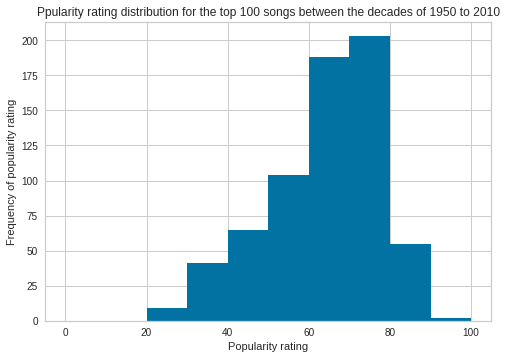

In [ ]:
merged_data['pop'].max()

bins_limits = []
accident_limit = 100
for i in range(0, accident_limit+10, 10):
  bins_limits.append(i)

fig, ax = plt.subplots()

ax.hist(
    x = merged_data['pop'], 
    bins=bins_limits, 
)

ax.set_title("Ppularity rating distribution for the top 100 songs between the decades of 1950 to 2010")
ax.set_xlabel("Popularity rating")
ax.set_ylabel("Frequency of popularity rating")

# Categorizing the categorical and numerical variables

Before we analyzed which song attributes correlated the most with the popularity of a song, it was important to classify which variables belonged to which categories. Categorical variables can be thought of as variables that are independent from the song in that they are not relevant when listening to the song in the moment; these include the artists, titles, and genres. On the other hand, numerical variables belong to the song itself and are relevant toward whether or not it would receive a positive reception from its listeners.


In [ ]:
# names of all the features (columns)
names_list = []
for col in df80.columns:
  names_list.append(col)

# TASK: Which are the `categorical` variables?
categorical_vars = ['title', 'artist', 'top genre']

# names of columns which should NOT be included in the model
vars_omit = ['pop', 'title', 'artist', 'Number']


# everything else is a `continuous` variable
continuous_vars = [v for v in names_list if v not in categorical_vars and v not in vars_omit]

print("Continuous Variables: " + str(continuous_vars))
print("Categorical Variables: " + str(categorical_vars))
print("Target Variables: " + 'pop')

Continuous Variables: ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
Categorical Variables: ['title', 'artist', 'top genre']
Target Variables: pop


# Section 1: The correlation between all the relevant attributes of a song and its popularity by using the linear regression model.

By using the linear regression model on all the relevant attributes of the song, there seems to be a strong correlation between the artists and the popularity of the song. This suggests that a song is only popular if its artist is already famous. However, we had to use models that were more optimal to further verify this claim.

## The 1950's

Before we analyzed the correlation of the variables with popularity, we first needed to put the respective datasets of each decade through preprocessing and established a distinction between the variables which are numeric, categorical, and ignored by the setup function. 

This function randomly separates 70% of the dataset into a training set and the other 30% is in a test set; due to this randomness, we include the session_id argument to ensure the reproducibility of our results. 

Additionally, the function outputs a table which contains various rows displaying the properties of the dataset--most of which are irrelevant to our project. We discarded the 'Number' column, because it is unrelated to the song, and we discarded the 'title' column, because it would entail a circular reasoning as to why a song is popular.

In [ ]:
# setup your regression parameters
regression_50_linear = setup(
    data = df50, 
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 1732
    )

,Description,Value
0,session_id,1732
1,Target,pop
2,Original Data,"(73, 15)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(51, 58)"


The compare_model function displays numerous regression models of the dataset of the respective decade and calculates its several metrics.

In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,7.040700e+00,8.467780e+01,8.385000e+00,-1.277000e-01,0.1944,1.702000e-01,0.416
omp,Orthogonal Matching Pursuit,7.452200e+00,9.535360e+01,8.826300e+00,-2.880000e-01,0.2044,1.792000e-01,0.015
catboost,CatBoost Regressor,7.818800e+00,9.475110e+01,9.008900e+00,-2.537000e-01,0.2133,1.960000e-01,1.118
ada,AdaBoost Regressor,7.851600e+00,1.041878e+02,9.485900e+00,-3.118000e-01,0.2226,1.965000e-01,0.091
lightgbm,Light Gradient Boosting Machine,8.174500e+00,1.113908e+02,9.678800e+00,-4.066000e-01,0.2288,2.038000e-01,0.106
dummy,Dummy Regressor,8.808700e+00,1.133323e+02,9.984000e+00,-3.247000e-01,0.2383,2.255000e-01,0.012
llar,Lasso Least Angle Regression,8.808700e+00,1.133323e+02,9.984000e+00,-3.247000e-01,0.2383,2.255000e-01,0.015
lasso,Lasso Regression,8.754500e+00,1.154627e+02,1.000270e+01,-4.449000e-01,0.2378,2.217000e-01,0.017
gbr,Gradient Boosting Regressor,8.359600e+00,1.155000e+02,1.001170e+01,-7.683000e-01,0.2317,2.059000e-01,0.058
br,Bayesian Ridge,8.853800e+00,1.139181e+02,1.004020e+01,-3.551000e-01,0.2397,2.268000e-01,0.017


The create_model function separates the dataset into 10 distinct folds--also known as groups. The model is going through each fold iterant in question and treats it as the test set whereas the other folds are used as the training set. This process is repeated as many times as there are number of folds. The table's rows represents the measured metrics of each group compared to the training set.

In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.3896,590.0207,24.2903,-37.1342,0.4404,0.4750
1,21.3897,745.1877,27.2981,-14.5247,1.4635,0.4904
2,29.2457,1038.0278,32.2184,-6.0981,0.8619,0.7833
3,21.8835,762.0404,27.6051,-4.3364,0.3352,0.6804
4,17.1091,404.8285,20.1204,-11.1061,0.4499,0.5323
5,23.5978,690.4605,26.2766,-3.1040,0.9331,0.4660
6,18.7971,467.0097,21.6104,-5.7487,1.1935,0.5213
7,32.6611,2047.4756,45.2490,-32.0238,0.7489,0.8377
8,26.0953,817.4583,28.5912,-5.5586,1.2462,0.7254


The predict_model uses a certain proportion of the original decade dataset as the training set and the test set and uses the trained model that was created by the create_model function to calculate the metrics of the chosen regression model.

In [ ]:
predictions = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,32.0947,1458.3123,38.1879,-12.9623,0.9483,0.8507


The evaluate_model outputs the overall performance of the model as well as the results associated with the model. The results indicate which variables are the most linked with popularity.

In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## The 1960's

In [ ]:
# setup your regression parameters
regression_60_linear = setup(
data = df60,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title','Number'],
session_id = 7578
)

,Description,Value
0,session_id,7578
1,Target,pop
2,Original Data,"(97, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(67, 76)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,8.105800e+00,9.839760e+01,9.725500e+00,-5.151000e-01,0.1841,1.610000e-01,0.013
omp,Orthogonal Matching Pursuit,8.468400e+00,1.116724e+02,1.034520e+01,-3.247000e-01,0.1973,1.679000e-01,0.013
et,Extra Trees Regressor,8.782100e+00,1.157665e+02,1.058750e+01,-4.389000e-01,0.2024,1.745000e-01,0.407
ada,AdaBoost Regressor,8.883300e+00,1.178874e+02,1.061670e+01,-6.481000e-01,0.2010,1.746000e-01,0.075
rf,Random Forest Regressor,8.971800e+00,1.199723e+02,1.070230e+01,-6.632000e-01,0.2008,1.778000e-01,0.410
catboost,CatBoost Regressor,9.136500e+00,1.269235e+02,1.093540e+01,-8.317000e-01,0.2037,1.795000e-01,1.048
gbr,Gradient Boosting Regressor,9.830200e+00,1.400705e+02,1.145710e+01,-1.114100e+00,0.2169,1.970000e-01,0.054
lasso,Lasso Regression,9.794500e+00,1.424944e+02,1.159530e+01,-1.001800e+00,0.2139,1.900000e-01,0.016
xgboost,Extreme Gradient Boosting,1.010290e+01,1.506728e+02,1.179330e+01,-1.658500e+00,0.2207,2.035000e-01,0.351
en,Elastic Net,1.014070e+01,1.507349e+02,1.200760e+01,-1.206200e+00,0.2213,1.972000e-01,0.014


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.0491,1816.8179,42.6241,-26.4427,0.6668,0.8169
1,14.1994,323.7450,17.9929,-15.8046,0.5788,0.3109
2,10.3753,128.4909,11.3354,0.3693,0.2016,0.1983
3,8.9833,141.3805,11.8904,-0.7646,0.1962,0.1493
4,8.2872,119.5957,10.9360,0.3146,0.1612,0.1175
5,39.1252,1858.8855,43.1148,-21.6018,0.9527,0.7436
6,9.4717,140.9378,11.8717,0.2927,0.2006,0.1738
7,69.4585,5676.3904,75.3418,-34.5021,1.5125,1.4667
8,8.9303,99.6275,9.9814,0.2305,0.2079,0.1973


In [ ]:
predictions = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,25.1037,996.4766,31.567,-7.6446,0.6324,0.4927


In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## The 1970's

In [ ]:
# setup your regression parameters
regression_70_linear = setup(
data = df70,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title','Number'],
session_id = 7884
)

,Description,Value
0,session_id,7884
1,Target,pop
2,Original Data,"(104, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(72, 66)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.601000e+00,6.815340e+01,7.982800e+00,1.511000e-01,0.1291,1.100000e-01,0.396
omp,Orthogonal Matching Pursuit,7.249900e+00,7.938840e+01,8.566200e+00,-1.430000e-02,0.1384,1.214000e-01,0.014
catboost,CatBoost Regressor,7.369100e+00,8.585280e+01,8.954500e+00,-6.410000e-02,0.1418,1.210000e-01,0.823
rf,Random Forest Regressor,7.469100e+00,8.791620e+01,9.032300e+00,-7.960000e-02,0.1429,1.227000e-01,0.407
dummy,Dummy Regressor,7.663600e+00,9.180900e+01,9.288700e+00,-1.047000e-01,0.1461,1.249000e-01,0.010
llar,Lasso Least Angle Regression,7.663600e+00,9.180900e+01,9.288700e+00,-1.047000e-01,0.1461,1.249000e-01,0.013
ada,AdaBoost Regressor,7.629200e+00,9.327090e+01,9.300600e+00,-1.731000e-01,0.1470,1.260000e-01,0.073
ridge,Ridge Regression,7.893400e+00,9.327250e+01,9.321200e+00,-1.930000e-01,0.1477,1.307000e-01,0.012
gbr,Gradient Boosting Regressor,7.869800e+00,9.356810e+01,9.377600e+00,-2.167000e-01,0.1496,1.299000e-01,0.053
br,Bayesian Ridge,7.990600e+00,9.486460e+01,9.493900e+00,-1.742000e-01,0.1491,1.298000e-01,0.016


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.6299,68.7092,8.2891,0.0022,0.1289,0.1030
1,8.3180,89.3590,9.4530,-0.3144,0.1524,0.1343
2,7.6687,88.7872,9.4227,0.0509,0.1603,0.1339
3,9.8906,191.7948,13.8490,-2.5172,0.2460,0.1558
4,8.8442,140.3694,11.8478,-0.4946,0.2131,0.1729
5,9.4192,137.3906,11.7214,-2.7030,0.1728,0.1331
6,11.1558,156.0776,12.4931,0.2903,0.2024,0.1935
7,12.5503,193.6376,13.9154,-1.7841,0.2077,0.2011
8,8.9440,203.8188,14.2765,-4.8473,0.1800,0.1334


In [ ]:
predictions = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,10.4818,146.676,12.111,-0.6916,0.1852,0.1636


In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## The 1980's

In [ ]:
# setup your regression parameters
regression_80_linear = setup(
data = df80,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number'],
session_id = 3514
)

,Description,Value
0,session_id,3514
1,Target,pop
2,Original Data,"(105, 15)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(73, 77)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,5.4314,52.9297,6.9508,-0.1568,0.1032,0.0835,0.282
dummy,Dummy Regressor,5.4314,52.9297,6.9508,-0.1568,0.1032,0.0835,0.011
br,Bayesian Ridge,5.6235,54.5399,7.1095,-0.2377,0.1055,0.0864,0.016
et,Extra Trees Regressor,5.8769,59.6826,7.4699,-0.4340,0.1115,0.0895,0.404
ada,AdaBoost Regressor,5.9299,62.4993,7.4833,-0.3658,0.1110,0.0918,0.075
catboost,CatBoost Regressor,6.1303,62.5256,7.5570,-0.4237,0.1124,0.0941,1.107
omp,Orthogonal Matching Pursuit,5.9794,65.2195,7.7134,-0.5239,0.1154,0.0916,0.014
rf,Random Forest Regressor,6.2410,66.1562,7.7534,-0.4826,0.1151,0.0958,0.408
gbr,Gradient Boosting Regressor,6.2049,66.1455,7.8130,-0.5405,0.1165,0.0947,0.053
lasso,Lasso Regression,6.3492,67.4151,7.8303,-0.4923,0.1160,0.0975,0.024


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,34.7592,1590.5338,39.8815,-22.0564,0.7850,0.5259
1,15.9677,476.5578,21.8302,-13.3326,0.4510,0.2338
2,16.5255,339.3318,18.4210,-18.2699,0.2427,0.2487
3,27.7451,1793.9175,42.3547,-47.5110,0.6902,0.3652
4,28.3055,1493.7909,38.6496,-11.1065,0.5855,0.4865
5,6.7548,60.4897,7.7775,-2.2217,0.1254,0.1038
6,14.6848,267.9355,16.3687,-7.1546,0.2261,0.2087
7,68.2880,6733.1964,82.0561,-133.1165,1.2621,1.0102
8,9.5651,138.0532,11.7496,-2.7046,0.1739,0.1420


In [ ]:
predictions = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,13.2838,336.0682,18.3322,-4.7605,0.3911,0.1975


In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## The 1990's

In [ ]:
# setup your regression parameters
regression_90_linear = setup(
data = df90, 
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number'],
session_id = 8883
)

,Description,Value
0,session_id,8883
1,Target,pop
2,Original Data,"(88, 15)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(61, 69)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,5.368600e+00,4.332460e+01,6.500000e+00,-5.550000e-01,0.0998,8.450000e-02,0.027
dummy,Dummy Regressor,5.791700e+00,4.761850e+01,6.627800e+00,-1.466000e-01,0.1027,9.220000e-02,0.010
llar,Lasso Least Angle Regression,5.791700e+00,4.761850e+01,6.627800e+00,-1.466000e-01,0.1027,9.220000e-02,0.023
br,Bayesian Ridge,5.810200e+00,4.795350e+01,6.648800e+00,-1.519000e-01,0.1030,9.250000e-02,0.030
catboost,CatBoost Regressor,5.752800e+00,4.955900e+01,6.649400e+00,-2.048000e-01,0.1027,9.200000e-02,1.089
xgboost,Extreme Gradient Boosting,5.689300e+00,4.915020e+01,6.667100e+00,-2.159000e-01,0.1025,9.080000e-02,0.531
lasso,Lasso Regression,5.744300e+00,4.586030e+01,6.681800e+00,-4.477000e-01,0.1034,9.080000e-02,0.023
omp,Orthogonal Matching Pursuit,5.837300e+00,4.871440e+01,6.715400e+00,-2.744000e-01,0.1051,9.400000e-02,0.025
en,Elastic Net,5.789900e+00,4.642570e+01,6.734300e+00,-5.122000e-01,0.1041,9.140000e-02,0.030
ada,AdaBoost Regressor,5.911200e+00,5.151900e+01,6.784200e+00,-2.403000e-01,0.1046,9.440000e-02,0.116


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,28.6833,966.8965,31.0950,-16.0057,0.4065,0.4379
1,14.4149,333.5732,18.2640,-10.3718,0.2594,0.2127
2,11.6194,190.1302,13.7888,-1.3602,0.2316,0.1859
3,29.1511,2023.2679,44.9808,-37.7228,0.4071,0.4123
4,13.4553,224.3226,14.9774,-20.0302,0.2098,0.2042
5,43.1471,2076.2047,45.5654,-38.2354,0.8549,0.7046
6,12.7975,270.5001,16.4469,-6.5139,0.3058,0.2083
7,39.5924,2641.9002,51.3994,-380.9615,1.0109,0.6018
8,19.4614,840.2598,28.9872,-11.9271,0.3962,0.3129


In [ ]:
predictions = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,37.3211,3084.3426,55.5369,-41.1444,0.5506,0.6109


In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## The 2000's

In [ ]:
# setup your regression parameters
regression_00_linear = setup(
data = df00, 
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number'],
session_id = 9977
)

,Description,Value
0,session_id,9977
1,Target,pop
2,Original Data,"(100, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 75)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.782900e+00,7.072560e+01,7.637900e+00,-1.504000e-01,0.1204,9.710000e-02,1.307
gbr,Gradient Boosting Regressor,5.834700e+00,7.304680e+01,7.786600e+00,-3.056000e-01,0.1227,9.810000e-02,0.073
et,Extra Trees Regressor,5.993000e+00,7.309950e+01,7.837200e+00,-1.728000e-01,0.1237,1.013000e-01,0.451
omp,Orthogonal Matching Pursuit,5.876800e+00,7.609350e+01,7.853200e+00,-1.134000e-01,0.1238,1.005000e-01,0.026
dummy,Dummy Regressor,6.202900e+00,7.516870e+01,7.975100e+00,-2.249000e-01,0.1247,1.029000e-01,0.019
llar,Lasso Least Angle Regression,6.202900e+00,7.516870e+01,7.975100e+00,-2.249000e-01,0.1247,1.029000e-01,0.021
huber,Huber Regressor,6.181600e+00,8.019070e+01,7.977300e+00,-1.613000e-01,0.1253,1.046000e-01,0.056
br,Bayesian Ridge,6.205800e+00,7.528590e+01,7.980200e+00,-2.260000e-01,0.1248,1.030000e-01,0.023
rf,Random Forest Regressor,6.031700e+00,7.628650e+01,7.980300e+00,-2.366000e-01,0.1250,1.015000e-01,0.516
xgboost,Extreme Gradient Boosting,6.465700e+00,7.767360e+01,8.243900e+00,-5.634000e-01,0.1284,1.056000e-01,0.606


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,12.6697,209.1920,14.4635,-10.2890,0.1836,0.1806
1,7.2998,71.9807,8.4841,-3.3869,0.1102,0.0984
2,15.6575,431.9371,20.7831,-2.1665,0.2951,0.2814
3,17.2525,421.3156,20.5260,-1.1287,0.3688,0.3530
4,13.0584,193.6824,13.9170,-3.3897,0.1862,0.1849
5,9.4305,139.0016,11.7899,-5.0922,0.1770,0.1316
6,14.8380,294.5275,17.1618,-5.0384,0.2682,0.2059
7,7.3478,71.5811,8.4606,-0.8918,0.1134,0.0997
8,5.8787,70.9138,8.4210,-1.0561,0.1151,0.0871


In [ ]:
predictions = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,8.9281,134.0873,11.5796,-0.7743,0.1782,0.1357


In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## The 2010's

In [ ]:
# setup your regression parameters
regression_10_linear = setup(
data = df10,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number'],
session_id = 9199
)

,Description,Value
0,session_id,9199
1,Target,pop
2,Original Data,"(100, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 70)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.016200e+00,7.694780e+01,8.041600e+00,1.280000e-01,0.1218,9.580000e-02,0.024
et,Extra Trees Regressor,6.053500e+00,8.654500e+01,8.316100e+00,7.720000e-02,0.1242,9.770000e-02,0.440
omp,Orthogonal Matching Pursuit,6.251000e+00,8.570760e+01,8.360200e+00,5.660000e-02,0.1252,1.001000e-01,0.024
lightgbm,Light Gradient Boosting Machine,6.602600e+00,8.558100e+01,8.596200e+00,-7.990000e-02,0.1290,1.029000e-01,0.033
ada,AdaBoost Regressor,6.295800e+00,9.110540e+01,8.755100e+00,-2.740000e-02,0.1314,1.004000e-01,0.108
catboost,CatBoost Regressor,6.404700e+00,9.217170e+01,8.792300e+00,-2.230000e-02,0.1326,1.029000e-01,1.278
br,Bayesian Ridge,6.568300e+00,9.067370e+01,8.860600e+00,-8.500000e-02,0.1329,1.037000e-01,0.025
rf,Random Forest Regressor,6.470500e+00,9.382730e+01,8.962300e+00,-1.968000e-01,0.1344,1.040000e-01,0.482
en,Elastic Net,6.919400e+00,9.193350e+01,8.997800e+00,-1.669000e-01,0.1348,1.075000e-01,0.028
lasso,Lasso Regression,6.936500e+00,9.292510e+01,9.034200e+00,-1.781000e-01,0.1354,1.078000e-01,0.028


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.9826,92.6340,9.6247,0.1949,0.1300,0.1153
1,8.1575,73.3841,8.5665,-0.6525,0.1126,0.1045
2,12.1309,258.5291,16.0788,-2.1559,0.2006,0.1746
3,8.2319,101.8014,10.0897,-1.9727,0.1325,0.1090
4,8.5885,122.2642,11.0573,0.1315,0.1846,0.1491
5,10.6081,292.3454,17.0981,-0.1093,0.3199,0.2481
6,9.7590,106.7836,10.3336,-0.6189,0.1340,0.1324
7,7.6645,74.7568,8.6462,-4.8329,0.1215,0.1002
8,23.0549,771.0677,27.7681,-10.7629,0.3440,0.2913


In [ ]:
predictions = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,27.9239,1113.9337,33.3756,-22.9023,0.664,0.3651


In [ ]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Section 2: The correlation between the various attributes of a song and its popularity by using the most optimal regression models available.

After using the most optimal models for each decade on all the relevant attributes of a song, the stated claim in Section 1 holds for the decades between 1950 and 1990; however, the influence of the artist on the popularity of a song for the decades of 2000 and 2010 dropped significantly. The 'artist' variable was overtaken by the numerical variables such as liveness, loudness, energy, etc. This discrepancy could be explained by the limitations of Spotify in that older songs would be popular due to the fact that only a mostly older audience would remember them by associating the song with the artist. This is proven by the absence of numeric variables in the feature importance plot, which indicates that these songs vary extensively to the point that their influence in popularity is dwarfed by the 'artist' variable.

The only outlier decade was the 1970s, in which numeric variables proved to reign supreme in terms of correlation to popularity. The general trend of artists being the main correlators still is present in all other decades except for the 1970s, and the latest two decades. 

## 1950's

In [ ]:
# setup your regression parameters
regression_50_optimal = setup(
    data = df50, 
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 5431
    )

,Description,Value
0,session_id,5431
1,Target,pop
2,Original Data,"(73, 15)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(51, 61)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,7.514000e+00,9.201320e+01,9.134700e+00,7.300000e-02,0.2062,1.805000e-01,0.019
catboost,CatBoost Regressor,7.692800e+00,9.234860e+01,9.205900e+00,1.341000e-01,0.2127,1.914000e-01,0.960
gbr,Gradient Boosting Regressor,7.637200e+00,9.229430e+01,9.295900e+00,8.840000e-02,0.2110,1.859000e-01,0.058
et,Extra Trees Regressor,7.452100e+00,9.671000e+01,9.413600e+00,5.930000e-02,0.2106,1.763000e-01,0.408
rf,Random Forest Regressor,7.752900e+00,9.769790e+01,9.431900e+00,7.560000e-02,0.2152,1.901000e-01,0.429
ridge,Ridge Regression,8.084600e+00,9.910120e+01,9.457200e+00,1.063000e-01,0.2199,2.009000e-01,0.017
lightgbm,Light Gradient Boosting Machine,8.092600e+00,1.017379e+02,9.620000e+00,-5.900000e-03,0.2214,2.015000e-01,0.026
xgboost,Extreme Gradient Boosting,8.616000e+00,1.036722e+02,9.938200e+00,-9.850000e-02,0.2299,2.145000e-01,0.389
ada,AdaBoost Regressor,8.493400e+00,1.125737e+02,9.999100e+00,-3.070000e-02,0.2311,2.106000e-01,0.093
llar,Lasso Least Angle Regression,8.698800e+00,1.155364e+02,1.046060e+01,-1.134000e-01,0.2451,2.212000e-01,0.017


Instead of selecting linear regression, we selected the regression model with the lowest RMSE value. In the event that one of the optimal models could not support a feature importance graph, we selected the next most optimal model and so on.

In [ ]:
omp = create_model('omp')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.2820,70.5794,8.4012,0.0182,0.2139,0.1690
1,6.2762,53.2939,7.3003,0.4222,0.1532,0.1341
2,6.7400,66.1152,8.1311,0.5030,0.1714,0.1557
3,14.0696,285.0456,16.8833,-0.2190,0.3635,0.3183
4,8.6870,106.4193,10.3160,0.0532,0.2599,0.2337
5,8.3178,98.4218,9.9208,-0.0726,0.1999,0.1765
6,5.5400,42.5152,6.5204,0.6115,0.1535,0.1375
7,9.3250,104.5781,10.2263,-0.7785,0.2407,0.2510
8,4.7200,48.2738,6.9479,0.5875,0.1388,0.0994


In [ ]:
predictions = predict_model(omp)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,6.8814,76.4968,8.7462,0.1078,0.1951,0.1536


In [ ]:
evaluate_model(omp)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1960's

In [ ]:
# setup your regression parameters
regression_60_optimal = setup(
    data = df60,
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 7766
    )

,Description,Value
0,session_id,7766
1,Target,pop
2,Original Data,"(97, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(67, 77)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,9.593400e+00,1.314928e+02,1.104460e+01,-2.420000e-02,0.2105,1.960000e-01,0.595
ridge,Ridge Regression,9.835000e+00,1.297820e+02,1.106020e+01,-6.390000e-02,0.2147,1.981000e-01,0.026
omp,Orthogonal Matching Pursuit,9.398500e+00,1.289742e+02,1.115810e+01,-4.310000e-02,0.2116,1.860000e-01,0.027
catboost,CatBoost Regressor,9.724100e+00,1.405077e+02,1.131760e+01,-2.010000e-02,0.2133,1.942000e-01,1.479
gbr,Gradient Boosting Regressor,9.783200e+00,1.418729e+02,1.135800e+01,-8.650000e-02,0.2142,1.934000e-01,0.088
ada,AdaBoost Regressor,9.717300e+00,1.414130e+02,1.146680e+01,-6.260000e-02,0.2161,1.937000e-01,0.127
lasso,Lasso Regression,1.039280e+01,1.417629e+02,1.162440e+01,-1.122000e-01,0.2211,2.078000e-01,0.027
rf,Random Forest Regressor,9.987400e+00,1.468238e+02,1.164820e+01,-1.137000e-01,0.2206,2.006000e-01,0.492
et,Extra Trees Regressor,9.678700e+00,1.426509e+02,1.168910e+01,-1.389000e-01,0.2194,1.905000e-01,0.458
en,Elastic Net,1.049600e+01,1.444079e+02,1.176240e+01,-1.440000e-01,0.2237,2.099000e-01,0.026


In [ ]:
xgboost	 = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.4973,55.4114,7.4439,0.4156,0.1530,0.1408
1,14.3571,236.7583,15.3870,-0.1928,0.3086,0.3437
2,5.8019,68.8990,8.3005,-0.0650,0.1597,0.1172
3,9.7091,127.2248,11.2794,-0.4565,0.2068,0.1848
4,9.3602,121.7655,11.0347,0.4141,0.1995,0.1831
5,14.5597,270.8514,16.4576,-0.5725,0.3234,0.3158
6,12.1732,167.3364,12.9359,-0.6419,0.2412,0.2217
7,5.4795,57.6496,7.5927,0.2960,0.1559,0.1213
8,6.8594,62.6732,7.9166,0.2878,0.1606,0.1434


In [ ]:
predictions = predict_model(xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,8.9831,124.4237,11.1545,-0.0469,0.1923,0.1614


In [ ]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1970's

In [ ]:
# setup your regression parameters
regression_70_optimal = setup(
    data = df70,
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 6213
)

,Description,Value
0,session_id,6213
1,Target,pop
2,Original Data,"(104, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(72, 65)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,7.459200e+00,9.024700e+01,9.159400e+00,-4.959000e-01,0.1420,1.213000e-01,1.065
et,Extra Trees Regressor,7.927800e+00,9.176070e+01,9.224000e+00,-5.845000e-01,0.1440,1.311000e-01,0.402
gbr,Gradient Boosting Regressor,7.716100e+00,9.506170e+01,9.349300e+00,-6.230000e-01,0.1448,1.257000e-01,0.050
ridge,Ridge Regression,7.978800e+00,1.029589e+02,9.424700e+00,-7.670000e-01,0.1460,1.307000e-01,0.013
xgboost,Extreme Gradient Boosting,8.053800e+00,9.860680e+01,9.495100e+00,-6.455000e-01,0.1480,1.318000e-01,0.342
lasso,Lasso Regression,8.039800e+00,1.049110e+02,9.593600e+00,-7.307000e-01,0.1473,1.315000e-01,0.014
br,Bayesian Ridge,8.096600e+00,1.001185e+02,9.602800e+00,-6.107000e-01,0.1475,1.314000e-01,0.015
rf,Random Forest Regressor,7.916400e+00,9.934610e+01,9.631700e+00,-6.222000e-01,0.1484,1.287000e-01,0.409
en,Elastic Net,8.059900e+00,1.060577e+02,9.642700e+00,-7.540000e-01,0.1481,1.319000e-01,0.014
llar,Lasso Least Angle Regression,8.231900e+00,1.000716e+02,9.649200e+00,-5.209000e-01,0.1488,1.332000e-01,0.013


In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.1921,61.2873,7.8286,0.0694,0.1264,0.1017
1,7.9574,73.7928,8.5903,-0.3618,0.1301,0.1257
2,7.4990,71.1703,8.4362,-0.6670,0.1334,0.1207
3,13.5240,263.1245,16.2211,-2.9213,0.2860,0.2862
4,6.3798,61.3492,7.8326,0.4976,0.1222,0.1015
5,5.9802,65.3936,8.0866,-0.5926,0.1124,0.0841
6,5.7745,68.2572,8.2618,-0.8458,0.1177,0.0777
7,9.2726,118.4835,10.8850,-0.1029,0.1539,0.1291
8,5.8064,65.0615,8.0661,0.5599,0.1354,0.1020


In [ ]:
predictions = predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,7.172,69.3863,8.3298,0.0977,0.1298,0.1159


In [ ]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1980's

In [ ]:
# setup your regression parameters
regression_80_optimal = setup(
    data = df80,
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 1575
    )

,Description,Value
0,session_id,1575
1,Target,pop
2,Original Data,"(105, 15)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(73, 77)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,5.863300e+00,5.459000e+01,6.956200e+00,2.180000e-02,0.1060,9.080000e-02,0.395
ridge,Ridge Regression,5.892600e+00,5.788680e+01,7.171100e+00,-4.750000e-02,0.1080,9.090000e-02,0.014
ada,AdaBoost Regressor,6.095100e+00,5.859760e+01,7.269500e+00,-7.780000e-02,0.1103,9.490000e-02,0.075
rf,Random Forest Regressor,5.973800e+00,6.194250e+01,7.368900e+00,-8.530000e-02,0.1118,9.390000e-02,0.407
xgboost,Extreme Gradient Boosting,6.097200e+00,6.089650e+01,7.441800e+00,-1.813000e-01,0.1125,9.560000e-02,0.354
catboost,CatBoost Regressor,6.195400e+00,6.522800e+01,7.618000e+00,-1.611000e-01,0.1160,9.740000e-02,1.124
dummy,Dummy Regressor,6.039200e+00,6.358780e+01,7.654900e+00,-1.903000e-01,0.1159,9.410000e-02,0.011
llar,Lasso Least Angle Regression,6.039200e+00,6.358780e+01,7.654900e+00,-1.903000e-01,0.1159,9.410000e-02,0.015
br,Bayesian Ridge,6.109500e+00,6.514550e+01,7.725800e+00,-2.066000e-01,0.1169,9.530000e-02,0.016
en,Elastic Net,6.304800e+00,6.628780e+01,7.755200e+00,-2.401000e-01,0.1170,9.770000e-02,0.014


In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.6125,36.8014,6.0664,0.0363,0.0926,0.0880
1,6.9288,69.2489,8.3216,-0.7231,0.1290,0.0999
2,3.8650,17.7404,4.2119,0.4432,0.0584,0.0548
3,2.3786,10.0937,3.1771,0.4984,0.0447,0.0342
4,8.8871,119.6442,10.9382,-0.0636,0.1824,0.1547
5,6.8614,64.0256,8.0016,0.0848,0.1307,0.1193
6,7.5043,80.7282,8.9849,-0.1987,0.1424,0.1258
7,3.3343,18.2402,4.2709,0.2387,0.0631,0.0502
8,5.2857,33.7920,5.8131,0.1835,0.0836,0.0773


In [ ]:
predictions = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.85,59.8665,7.7373,-0.6798,0.1201,0.0867


In [ ]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1990's

In [ ]:
# setup your regression parameters
regression_90_optimal = setup(
    data = df90, 
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 7642
)

,Description,Value
0,session_id,7642
1,Target,pop
2,Original Data,"(88, 15)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(61, 72)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,6.058400e+00,5.875690e+01,7.367300e+00,-1.949000e-01,0.1185,9.950000e-02,0.021
dummy,Dummy Regressor,6.145700e+00,5.836450e+01,7.457700e+00,-1.346000e-01,0.1208,1.021000e-01,0.013
llar,Lasso Least Angle Regression,6.145700e+00,5.836450e+01,7.457700e+00,-1.346000e-01,0.1208,1.021000e-01,0.026
br,Bayesian Ridge,6.182300e+00,5.868500e+01,7.486500e+00,-1.465000e-01,0.1213,1.027000e-01,0.025
lasso,Lasso Regression,6.375000e+00,6.096360e+01,7.599200e+00,-2.302000e-01,0.1223,1.050000e-01,0.019
en,Elastic Net,6.403200e+00,6.193300e+01,7.659700e+00,-2.527000e-01,0.1232,1.055000e-01,0.021
omp,Orthogonal Matching Pursuit,6.293700e+00,6.316140e+01,7.697700e+00,-4.375000e-01,0.1258,1.036000e-01,0.023
rf,Random Forest Regressor,6.233000e+00,6.441050e+01,7.859400e+00,-4.046000e-01,0.1271,1.039000e-01,0.480
knn,K Neighbors Regressor,6.336700e+00,6.392600e+01,7.903400e+00,-4.152000e-01,0.1280,1.064000e-01,0.087
catboost,CatBoost Regressor,6.291000e+00,6.557290e+01,7.910800e+00,-4.513000e-01,0.1285,1.047000e-01,1.321


In [ ]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.3336,60.6181,7.7858,0.3231,0.1398,0.1168
1,6.6375,69.1545,8.3159,-0.5482,0.1344,0.1107
2,7.8567,82.4896,9.0824,-1.2211,0.1459,0.1306
3,4.9346,63.5254,7.9703,0.0310,0.1404,0.0942
4,5.0699,31.7809,5.6375,0.4271,0.0933,0.0858
5,6.7357,73.6069,8.5794,-0.1767,0.1268,0.1005
6,9.6514,119.7776,10.9443,-1.4444,0.1632,0.1424
7,4.3788,25.6700,5.0666,-0.0454,0.0809,0.0721
8,2.7400,9.8974,3.1460,0.4253,0.0514,0.0435


In [ ]:
predictions = predict_model(ridge)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,5.0234,35.1654,5.93,0.2789,0.0935,0.0785


In [ ]:
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 2000's

In [ ]:
# setup your regression parameters
regression_00_optimal = setup(
    data = df00, 
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 8827
)

,Description,Value
0,session_id,8827
1,Target,pop
2,Original Data,"(100, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 77)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,6.416500e+00,6.350880e+01,7.581300e+00,-5.182000e-01,0.1163,1.014000e-01,0.074
rf,Random Forest Regressor,6.351300e+00,6.534660e+01,7.688700e+00,-6.826000e-01,0.1180,1.002000e-01,0.509
catboost,CatBoost Regressor,6.460600e+00,6.702330e+01,7.872700e+00,-7.944000e-01,0.1206,1.018000e-01,0.994
dummy,Dummy Regressor,6.795500e+00,6.869790e+01,7.928100e+00,-5.642000e-01,0.1211,1.071000e-01,0.009
llar,Lasso Least Angle Regression,6.795500e+00,6.869790e+01,7.928100e+00,-5.642000e-01,0.1211,1.071000e-01,0.025
br,Bayesian Ridge,6.799400e+00,6.878970e+01,7.934400e+00,-5.670000e-01,0.1212,1.072000e-01,0.026
gbr,Gradient Boosting Regressor,6.427800e+00,6.716440e+01,7.988900e+00,-1.033300e+00,0.1238,1.007000e-01,0.052
et,Extra Trees Regressor,6.550400e+00,7.238630e+01,8.221300e+00,-9.190000e-01,0.1264,1.050000e-01,0.404
huber,Huber Regressor,6.468900e+00,7.542480e+01,8.243200e+00,-5.172000e-01,0.1248,1.038000e-01,0.057
knn,K Neighbors Regressor,6.998100e+00,7.459180e+01,8.275400e+00,-6.306000e-01,0.1261,1.095000e-01,0.075


In [ ]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.9701,123.5908,11.1171,0.0910,0.1841,0.1574
1,6.3734,50.5999,7.1134,-0.1394,0.0990,0.0890
2,5.9277,38.9518,6.2411,0.1464,0.0896,0.0859
3,7.2966,121.1515,11.0069,0.1732,0.1996,0.1450
4,6.4416,50.8129,7.1283,-0.2229,0.1015,0.0939
5,3.2744,16.3331,4.0414,0.4960,0.0616,0.0502
6,3.3324,16.3413,4.0424,0.1694,0.0571,0.0487
7,6.4715,54.3768,7.3741,0.0925,0.1124,0.1030
8,6.6291,52.2191,7.2263,-5.1508,0.0989,0.0876


In [ ]:
predictions = predict_model(ada)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,6.8996,104.7184,10.2332,-0.2608,0.1718,0.1125


In [ ]:
evaluate_model(ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 2010's

In [ ]:
# setup your regression parameters
regression_10_optimal = setup(
    data = df10,
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number'],
    session_id = 9854
)

,Description,Value
0,session_id,9854
1,Target,pop
2,Original Data,"(100, 15)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 73)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.7651,75.8174,7.7909,0.0118,0.1178,0.0923,1.304
et,Extra Trees Regressor,5.8318,82.6094,7.8733,0.0107,0.1186,0.0943,0.447
ada,AdaBoost Regressor,5.9009,83.2302,8.0367,-0.0134,0.1211,0.0954,0.113
omp,Orthogonal Matching Pursuit,6.1175,84.2570,8.0863,-0.0356,0.1216,0.0984,0.022
gbr,Gradient Boosting Regressor,6.2638,85.5441,8.1758,-0.0560,0.1228,0.0998,0.076
ridge,Ridge Regression,6.0932,83.7172,8.2429,-0.2787,0.1228,0.0962,0.024
rf,Random Forest Regressor,6.0824,85.3717,8.3262,-0.1236,0.1250,0.0979,0.487
huber,Huber Regressor,6.2529,84.8813,8.3382,-0.2885,0.1252,0.1003,0.054
br,Bayesian Ridge,6.3205,84.7004,8.4772,-0.2613,0.1267,0.0993,0.024
lightgbm,Light Gradient Boosting Machine,6.3681,86.1756,8.5003,-0.2506,0.1267,0.0997,0.130


In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.6613,156.5320,12.5113,0.0869,0.2098,0.1440
1,5.1650,52.5094,7.2463,-0.0392,0.1016,0.0739
2,5.4761,56.9034,7.5434,0.1484,0.1150,0.0860
3,4.3738,23.1343,4.8098,0.2562,0.0647,0.0607
4,11.0249,291.6123,17.0767,-0.0281,0.3205,0.2498
5,6.7219,78.3049,8.8490,-0.4678,0.1053,0.0782
6,3.8813,21.1304,4.5968,0.2250,0.0607,0.0514
7,5.2915,30.2960,5.5042,0.2187,0.0734,0.0721
8,4.3181,24.5693,4.9567,0.2632,0.0648,0.0578


In [ ]:
predictions = predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,5.8497,56.8049,7.5369,0.2353,0.1048,0.08


In [ ]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Section 3: The correlation between the numeric attributes of a song and its popularity by using the most optimal regression models available.

After using the most optimal models for each decade on all the relevant attributes of a song, the duration and energy of a song were the most frequent variables that were correlated with its popularity. The influence of valence was prominent between the 1970s and the 2000s. Additionally, there was a sudden increase in the the importance of bpm for a song to be popular during the 2010s. 

If a slightly less optimal model is used, it is because the models more optimal than it either yield improper feature importance results, or none at all. 

##1950's

Unlike the previous sections, we discarded every variable that was unrelated to the song itself and asked ourselves what are the inherent, numerical features of a song that made it popular. The discarded features include the artist, the title, and the genre. We wanted to remove any external factors that would not be known by a listener who is not familiar with these aforementionned variables.

In [ ]:
# setup your regression parameters
regression_50_numeric = setup(
    data = df50, 
    target = 'pop',
    numeric_features = continuous_vars,
    categorical_features = categorical_vars,
    ignore_features = ['title', 'Number', 'artist', 'year', 'top genre'],
    session_id = 8217
    )

,Description,Value
0,session_id,8217
1,Target,pop
2,Original Data,"(73, 15)"
3,Missing Values,True
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(51, 9)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,7.7621,100.6067,9.4652,-0.2372,0.2250,0.1983,0.663
dummy,Dummy Regressor,8.0152,101.9307,9.4991,-0.1121,0.2269,0.2088,0.014
llar,Lasso Least Angle Regression,8.0152,101.9307,9.4991,-0.1121,0.2269,0.2088,0.013
br,Bayesian Ridge,8.0269,102.4635,9.5202,-0.1158,0.2273,0.2090,0.014
omp,Orthogonal Matching Pursuit,8.0452,106.6021,9.8116,-0.2860,0.2326,0.2076,0.013
et,Extra Trees Regressor,8.6457,110.3307,10.0838,-0.4067,0.2395,0.2241,0.355
rf,Random Forest Regressor,8.5363,111.6899,10.2137,-0.5214,0.2456,0.2227,0.408
par,Passive Aggressive Regressor,8.5365,126.7885,10.3816,-0.4641,0.2503,0.2350,0.014
ada,AdaBoost Regressor,8.6240,117.1569,10.5072,-0.6771,0.2511,0.2229,0.072
lightgbm,Light Gradient Boosting Machine,8.5291,126.5552,10.7013,-0.6605,0.2527,0.2155,0.082


In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.6049,89.4331,9.4569,-1.2421,0.2150,0.1928
1,5.9474,64.2873,8.0179,0.1899,0.2181,0.1848
2,12.0604,229.8511,15.1608,0.1807,0.3148,0.2875
3,9.9319,132.3870,11.5060,-0.1670,0.2632,0.2291
4,3.7446,18.2181,4.2683,0.6497,0.1108,0.1031
5,2.6410,11.8545,3.4430,0.1858,0.0800,0.0667
6,9.5051,118.2734,10.8754,-0.1733,0.2774,0.2644
7,7.9206,110.2706,10.5010,-0.4853,0.2786,0.2529
8,7.0438,94.1584,9.7035,-1.6933,0.2302,0.1525


In [ ]:
predictions = predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,8.542,107.277,10.3575,0.0831,0.2384,0.2065


In [ ]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1960's

In [ ]:
# setup your regression parameters
regression_60_numeric = setup(
data = df60,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number', 'artist', 'year', 'top genre'],
session_id = 7579
)

,Description,Value
0,session_id,7579
1,Target,pop
2,Original Data,"(97, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(67, 9)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,10.5743,154.1706,12.1521,-0.7874,0.2280,0.2093,0.021
omp,Orthogonal Matching Pursuit,10.8546,160.5991,12.1833,-0.8170,0.2305,0.2135,0.013
dummy,Dummy Regressor,10.7263,164.3112,12.2143,-0.8363,0.2314,0.2122,0.013
llar,Lasso Least Angle Regression,10.7263,164.3112,12.2143,-0.8363,0.2314,0.2122,0.014
catboost,CatBoost Regressor,10.6188,161.5573,12.2337,-0.7553,0.2297,0.2104,0.825
en,Elastic Net,10.8514,162.1419,12.3015,-0.8012,0.2308,0.2139,0.014
lasso,Lasso Regression,10.8900,162.9968,12.3361,-0.8111,0.2316,0.2150,0.015
ridge,Ridge Regression,10.8563,163.3109,12.3523,-0.8198,0.2318,0.2135,0.013
lr,Linear Regression,10.8584,163.3550,12.3541,-0.8204,0.2318,0.2136,0.013
lar,Least Angle Regression,10.8584,163.3550,12.3541,-0.8204,0.2318,0.2136,0.015


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8.4834,95.9812,9.7970,-0.2241,0.1892,0.1720
1,11.9282,216.3720,14.7096,-0.2706,0.3011,0.2748
2,8.9310,107.9437,10.3896,0.0338,0.2028,0.1877
3,9.4616,116.7269,10.8040,-0.9791,0.2263,0.2250
4,12.5068,185.5341,13.6211,-0.3066,0.2821,0.2847
5,11.3345,154.7724,12.4408,-0.7736,0.2428,0.2291
6,11.0171,142.9978,11.9582,0.0456,0.2175,0.2109
7,7.7716,79.0726,8.8923,-1.3623,0.1713,0.1635
8,8.8190,120.0741,10.9578,0.2266,0.1708,0.1373


In [ ]:
predictions = predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,10.5727,161.6971,12.716,-0.4768,0.2211,0.1906


In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1970's

In [ ]:
# setup your regression parameters
regression_70_numeric = setup(
data = df70,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number', 'artist', 'year', 'top genre'],
session_id = 7889
)

,Description,Value
0,session_id,7889
1,Target,pop
2,Original Data,"(104, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(72, 9)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,7.5711,86.4812,9.0986,-0.1185,0.1416,0.1219,0.021
lasso,Lasso Regression,7.9283,92.6437,9.3030,-0.2992,0.1439,0.1262,0.014
en,Elastic Net,7.9314,93.1586,9.3272,-0.3097,0.1443,0.1263,0.015
dummy,Dummy Regressor,8.0563,91.9985,9.3643,-0.1149,0.1452,0.1288,0.011
llar,Lasso Least Angle Regression,8.0563,91.9985,9.3643,-0.1149,0.1452,0.1288,0.013
omp,Orthogonal Matching Pursuit,8.1809,93.2906,9.3879,-0.1698,0.1446,0.1301,0.012
rf,Random Forest Regressor,7.9044,92.5241,9.4334,-0.1909,0.1465,0.1258,0.410
ridge,Ridge Regression,7.9926,95.7367,9.4384,-0.3603,0.1460,0.1274,0.012
lr,Linear Regression,7.9931,95.7723,9.4397,-0.3610,0.1461,0.1274,0.013
catboost,CatBoost Regressor,7.7719,91.4484,9.4454,-0.2090,0.1467,0.1233,0.698


In [ ]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.1526,74.4637,8.6292,0.2932,0.1381,0.0997
1,7.3103,83.6885,9.1481,-0.8299,0.1444,0.1245
2,5.7495,40.3529,6.3524,0.3707,0.1014,0.0941
3,10.0790,132.9716,11.5313,0.0181,0.1750,0.1573
4,9.4701,121.2735,11.0124,0.0919,0.1849,0.1656
5,9.6077,115.8129,10.7616,0.2421,0.1683,0.1562
6,7.1595,74.8818,8.6534,-0.0170,0.1248,0.1030
7,4.5661,36.9219,6.0763,-0.4878,0.0861,0.0638
8,5.7243,56.2117,7.4974,-0.1457,0.1232,0.0979


In [ ]:
predictions = predict_model(lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,8.0348,93.9271,9.6916,-0.098,0.1532,0.1303


In [ ]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1980's


In [ ]:
# setup your regression parameters
regression_80_numeric = setup(
data = df80,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number', 'artist', 'year', 'top genre'],
session_id = 3518
)

,Description,Value
0,session_id,3518
1,Target,pop
2,Original Data,"(105, 15)"
3,Missing Values,True
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(73, 9)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.2334,47.1867,6.4501,-0.0326,0.0982,0.0820,0.727
gbr,Gradient Boosting Regressor,5.4931,51.0193,6.6762,-0.0595,0.1021,0.0864,0.049
rf,Random Forest Regressor,5.5140,54.9110,6.9380,-0.2868,0.1053,0.0863,0.411
ada,AdaBoost Regressor,5.4841,56.1680,6.9750,-0.2565,0.1055,0.0863,0.073
br,Bayesian Ridge,5.6678,55.9528,7.0381,-0.2073,0.1063,0.0886,0.014
dummy,Dummy Regressor,5.7999,58.8292,7.2152,-0.2811,0.1088,0.0906,0.011
llar,Lasso Least Angle Regression,5.7999,58.8292,7.2152,-0.2811,0.1088,0.0906,0.014
et,Extra Trees Regressor,5.9155,60.1619,7.2452,-0.3228,0.1101,0.0927,0.356
lightgbm,Light Gradient Boosting Machine,5.8117,58.5283,7.2798,-0.5082,0.1104,0.0903,0.022
en,Elastic Net,5.9830,59.7920,7.3266,-0.3177,0.1107,0.0933,0.015


In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.0739,79.8004,8.9331,0.0384,0.1472,0.1217
1,5.0664,35.3621,5.9466,-0.3471,0.0873,0.0779
2,9.4734,119.8594,10.9480,0.2426,0.1842,0.1667
3,3.2532,14.1857,3.7664,-1.1858,0.0538,0.0457
4,5.3946,44.7265,6.6878,0.1919,0.0968,0.0807
5,3.8835,25.1993,5.0199,-0.0256,0.0699,0.0542
6,7.0826,71.6088,8.4622,0.2213,0.1291,0.1079
7,2.2302,8.6776,2.9458,0.6764,0.0417,0.0315
8,3.6423,21.9479,4.6849,0.2448,0.0712,0.0573


In [ ]:
predictions = predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,5.5638,55.2674,7.4342,-0.4195,0.1072,0.0805


In [ ]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 1990's

In [ ]:
# setup your regression parameters
regression_90_numeric = setup(
data = df90, 
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number', 'artist', 'year', 'top genre'], 
session_id = 8347
)

,Description,Value
0,session_id,8347
1,Target,pop
2,Original Data,"(88, 15)"
3,Missing Values,True
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(61, 9)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,6.3601,60.0494,7.4771,-0.4401,0.1204,0.1059,0.041
dummy,Dummy Regressor,6.7468,65.4675,7.8924,-0.6169,0.1264,0.1119,0.010
llar,Lasso Least Angle Regression,6.7468,65.4675,7.8924,-0.6169,0.1264,0.1119,0.022
br,Bayesian Ridge,6.7857,65.7662,7.9179,-0.6307,0.1268,0.1125,0.024
lasso,Lasso Regression,7.0471,69.2339,8.2168,-0.9499,0.1320,0.1166,0.025
en,Elastic Net,7.0846,69.7424,8.2522,-0.9743,0.1325,0.1171,0.023
lr,Linear Regression,7.0799,70.0170,8.2712,-1.0247,0.1330,0.1170,0.026
ridge,Ridge Regression,7.0809,70.0151,8.2712,-1.0239,0.1330,0.1171,0.023
lar,Least Angle Regression,7.0799,70.0170,8.2712,-1.0247,0.1330,0.1170,0.022
knn,K Neighbors Regressor,7.2943,73.6996,8.4240,-0.9543,0.1343,0.1197,0.081


In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.9927,43.1688,6.5703,-0.0430,0.1037,0.0979
1,6.8613,78.6037,8.8659,-0.1536,0.1531,0.1264
2,4.3246,27.5058,5.2446,-0.3527,0.0774,0.0634
3,7.5220,75.6677,8.6987,-0.0100,0.1308,0.1159
4,5.4576,43.8183,6.6195,-1.3615,0.0965,0.0767
5,8.1857,102.4023,10.1194,-0.1517,0.1757,0.1543
6,7.5417,70.5093,8.3970,-3.3689,0.1389,0.1368
7,5.6985,48.4051,6.9574,-0.4042,0.1008,0.0813
8,9.9230,124.9716,11.1791,0.0013,0.1913,0.1750


In [ ]:
predictions = predict_model(br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,5.2469,42.9665,6.5549,-0.0047,0.1033,0.084


In [ ]:
evaluate_model(br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 2000's

In [ ]:
# setup your regression parameters
regression_00_numeric = setup(
data = df00, 
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number', 'artist', 'year', 'top genre'],
session_id = 9687
)

,Description,Value
0,session_id,9687
1,Target,pop
2,Original Data,"(100, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 9)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,6.2799,75.9750,8.0578,-0.5906,0.1262,0.1036,0.017
dummy,Dummy Regressor,6.2799,75.9750,8.0578,-0.5906,0.1262,0.1036,0.012
br,Bayesian Ridge,6.3053,76.2976,8.0860,-0.6064,0.1267,0.1040,0.014
ada,AdaBoost Regressor,6.5197,78.3962,8.4042,-0.8281,0.1317,0.1060,0.074
catboost,CatBoost Regressor,6.6637,83.0762,8.5446,-0.8648,0.1333,0.1090,0.747
knn,K Neighbors Regressor,6.4957,83.8582,8.5481,-0.9927,0.1334,0.1065,0.063
lightgbm,Light Gradient Boosting Machine,6.7457,89.4364,8.6818,-0.8277,0.1345,0.1111,0.025
omp,Orthogonal Matching Pursuit,7.0109,90.1036,8.9448,-1.0917,0.1387,0.1138,0.014
et,Extra Trees Regressor,7.0645,91.3802,9.1327,-1.2126,0.1428,0.1141,0.363
rf,Random Forest Regressor,7.2039,94.3118,9.2601,-1.2126,0.1447,0.1158,0.425


In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.5707,36.9734,6.0806,-0.2324,0.0909,0.0719
1,4.2868,29.6612,5.4462,-0.0396,0.0785,0.0627
2,5.2490,35.5888,5.9656,-0.2127,0.0816,0.0722
3,8.1017,72.4287,8.5105,-0.0025,0.1221,0.1189
4,5.0369,45.4763,6.7436,-0.0278,0.0982,0.0742
5,5.0773,36.5883,6.0488,-0.0436,0.0871,0.0754
6,9.3943,170.7805,13.0683,-0.2610,0.2284,0.1839
7,6.0155,44.3856,6.6622,-4.4102,0.0892,0.0781
8,10.3143,247.5068,15.7323,-0.0590,0.3038,0.2384


In [ ]:
predictions = predict_model(br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,6.6462,73.3303,8.5633,-0.0348,0.1332,0.1065


In [ ]:
evaluate_model(br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## 2010's

In [ ]:
# setup your regression parameters
regression_10_numeric = setup(
data = df10,
target = 'pop',
numeric_features = continuous_vars,
categorical_features = categorical_vars,
ignore_features = ['title', 'Number', 'artist', 'year', 'top genre'],
session_id = 91
)

,Description,Value
0,session_id,91
1,Target,pop
2,Original Data,"(100, 15)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 9)"


In [ ]:
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,6.2840,86.5370,7.9799,-0.4135,0.1164,0.0994,0.015
dummy,Dummy Regressor,6.7712,98.7768,8.3630,-0.2856,0.1210,0.1069,0.011
llar,Lasso Least Angle Regression,6.7712,98.7768,8.3630,-0.2856,0.1210,0.1069,0.013
lasso,Lasso Regression,6.7529,92.9923,8.5261,-0.9695,0.1240,0.1051,0.017
en,Elastic Net,6.7506,93.2037,8.5376,-0.9902,0.1241,0.1050,0.014
catboost,CatBoost Regressor,6.6625,93.9094,8.5379,-0.8030,0.1264,0.1048,0.738
et,Extra Trees Regressor,6.5780,93.0095,8.5678,-1.0001,0.1260,0.1027,0.363
omp,Orthogonal Matching Pursuit,7.0970,93.0880,8.5742,-0.9514,0.1238,0.1098,0.012
ridge,Ridge Regression,6.8891,97.0589,8.7503,-1.1185,0.1267,0.1066,0.013
lar,Least Angle Regression,6.8950,97.1944,8.7572,-1.1224,0.1268,0.1067,0.014


In [ ]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.9245,60.1233,7.7539,-0.5538,0.0953,0.0697
1,3.0743,14.9832,3.8708,-2.8238,0.0516,0.0402
2,14.6154,430.9550,20.7595,-0.3106,0.3813,0.3502
3,9.8465,129.0207,11.3587,0.2060,0.1610,0.1469
4,4.3059,25.7526,5.0747,0.1369,0.0644,0.0544
5,4.0650,34.3258,5.8588,-0.6049,0.0749,0.0505
6,2.4406,11.4537,3.3843,0.1771,0.0462,0.0343
7,5.7447,40.5422,6.3673,-0.3663,0.0826,0.0742
8,6.7393,62.2016,7.8868,0.0312,0.1004,0.0856


In [ ]:
predictions = predict_model(br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,6.5234,63.388,7.9617,-0.0888,0.1071,0.0864


In [ ]:
evaluate_model(br)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Conclusion

We have found in our data that with the progression of
each decade, the popularity of a song has less to do
with the artist themselves, but more to do with the musical
attributes excluding categoricals. In summary, the 'artist' variable's
correlation with the 'popularity' variable increases for a song
as it grows older. Since songs in the 2000's and 2010's
are much newer, their popularity depends much more upon
variables such as danceability, energy, duration, etc.
As for Spotify itself, assuming an older audience listens to
songs of older decades, people seek out those songs due, potentially,
to nostalgia and knowing the artist. However, for younger audiences,
their newer music selection may be much more dependent on the song's inherent
musical features, for example, how danceable a song is.
As time goes on, the artist will have an increasingly powerful
effect on the popularity of a song.

# Sources


https://www.kaggle.com/datasets/cnic92/spotify-past-decades-songs-50s10s

https://pycaret.gitbook.io

https://pycaret.readthedocs.io/en/latest/index.html

https://towardsdatascience.com/predicting-spotify-song-popularity-49d000f254c7

https://towardsdatascience.com/predicting-popularity-on-spotify-when-data-needs-culture-more-than-culture-needs-data-2ed3661f75f1